## ε-greedy policy vs. UCB policy

In [1]:
import random

# sample a coin at a given probability p
def sample_coin(p):
    if random.uniform(0, 1) < p:
        return 1
    else:
        return 0

In [2]:
import numpy as np

def epsilon_greedy_policy(p1, p2, epsilon, iterations):
    prob = [p1, p2] # prob for coin1, coin2
    counts = [0, 0]
    rewards = [0, 0]
    cum_reward = 0
    cum_rewards = [] # for plotting
    
    for i in range(iterations):
        values = [0, 1]
        probabilities = [epsilon, 1 - epsilon]
        way = np.random.choice(values, 1, probabilities)
        
        if way == 0: # with prob = epsilon, choose a random action
            action = np.random.choice(values, 1)
            action = action[0] # integer scalar index
        else: # with prob = (1 - epsilon), choose action with max. mean reward
            mean_reward = [rewards[0] /(counts[0] + 1), rewards[1] /(counts[1] + 1)]
            if mean_reward[0] > mean_reward[1]:
                action = 0
            else:
                action = 1
        
        reward = sample_coin(prob[action])
        rewards[action] += reward
        counts[action] += 1
        cum_reward += reward
        cum_rewards.append(cum_reward)
        
    return cum_rewards        

In [3]:
def ucb_policy(p1, p2, iterations):
    prob = [p1, p2] # prob for coin1, coin2
    counts = [0, 0]
    rewards = [0, 0]
    cum_reward = 0
    cum_rewards = [] # for plotting
    
    for i in range(1, iterations + 1):
        upper_bounds = [1e5, 1e5]
        for j in range(2): # play both the actions for each iteration
            '''if counts[j] == 0:
                counts[j] = 1 # division by zero '''
            if counts[j] > 0:
                mean_reward = rewards[j] / counts[j]
                upper_bound = mean_reward + (np.sqrt(2 * np.log(i)) / counts[j])
                upper_bounds[j] = upper_bound
            
            # play the action which maximizes the upper bound
            if upper_bounds[0] > upper_bounds[1]:
                action = 0
            else:
                action = 1
        
        reward = sample_coin(prob[action])
        rewards[action] += reward
        counts[action] += 1
        cum_reward += reward
        cum_rewards.append(cum_reward)
        
    return cum_rewards

In [4]:
# small gap - prob. = {0.6, 0.8}
ep1 = epsilon_greedy_policy(0.6, 0.8, 0.1, 1000)
ep2 = epsilon_greedy_policy(0.6, 0.8, 0.4, 1000)
ep3 = epsilon_greedy_policy(0.6, 0.8, 0.6, 1000)
ep4 = epsilon_greedy_policy(0.6, 0.8, 0.9, 1000)
ucb = ucb_policy(0.6, 0.8, 1000)

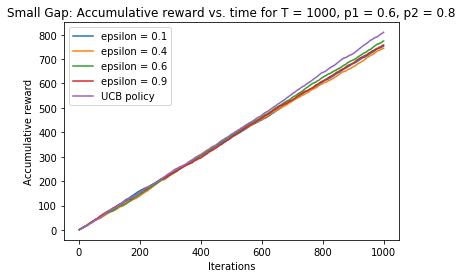

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

iterations = np.arange(1, 1001)
plt.plot(iterations, ep1, label = 'epsilon = 0.1')
plt.plot(iterations, ep2, label = 'epsilon = 0.4')
plt.plot(iterations, ep3, label = 'epsilon = 0.6')
plt.plot(iterations, ep4, label = 'epsilon = 0.9')
plt.plot(iterations, ucb, label = 'UCB policy')
plt.xlabel('Iterations')
plt.ylabel('Accumulative reward')
plt.legend()
plt.title('Small Gap: Accumulative reward vs. time for T = 1000, p1 = 0.6, p2 = 0.8')
plt.savefig('1_a.png')
plt.show()

In [6]:
# small gap - prob. = {0.5, 0.4}
ep1 = epsilon_greedy_policy(0.5, 0.4, 0.1, 1000)
ep2 = epsilon_greedy_policy(0.5, 0.4, 0.4, 1000)
ep3 = epsilon_greedy_policy(0.5, 0.4, 0.6, 1000)
ep4 = epsilon_greedy_policy(0.5, 0.4, 0.9, 1000)
ucb = ucb_policy(0.5, 0.4, 1000)

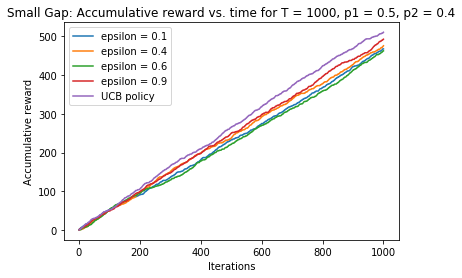

In [7]:
iterations = np.arange(1, 1001)
plt.plot(iterations, ep1, label = 'epsilon = 0.1')
plt.plot(iterations, ep2, label = 'epsilon = 0.4')
plt.plot(iterations, ep3, label = 'epsilon = 0.6')
plt.plot(iterations, ep4, label = 'epsilon = 0.9')
plt.plot(iterations, ucb, label = 'UCB policy')
plt.xlabel('Iterations')
plt.ylabel('Accumulative reward')
plt.legend()
plt.title('Small Gap: Accumulative reward vs. time for T = 1000, p1 = 0.5, p2 = 0.4')
plt.savefig('1_b.png')
plt.show()

In [8]:
# large gap - prob. = {0.1, 0.9}
ep1 = epsilon_greedy_policy(0.1, 0.9, 0.1, 1000)
ep2 = epsilon_greedy_policy(0.1, 0.9, 0.4, 1000)
ep3 = epsilon_greedy_policy(0.1, 0.9, 0.6, 1000)
ep4 = epsilon_greedy_policy(0.1, 0.9, 0.9, 1000)
ucb = ucb_policy(0.1, 0.9, 1000)

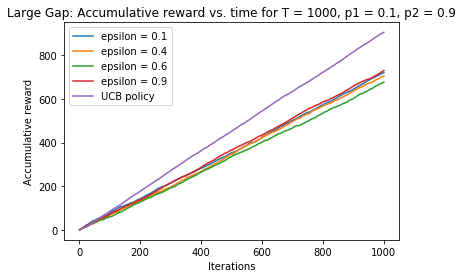

In [9]:
iterations = np.arange(1, 1001)
plt.plot(iterations, ep1, label = 'epsilon = 0.1')
plt.plot(iterations, ep2, label = 'epsilon = 0.4')
plt.plot(iterations, ep3, label = 'epsilon = 0.6')
plt.plot(iterations, ep4, label = 'epsilon = 0.9')
plt.plot(iterations, ucb, label = 'UCB policy')
plt.xlabel('Iterations')
plt.ylabel('Accumulative reward')
plt.legend()
plt.title('Large Gap: Accumulative reward vs. time for T = 1000, p1 = 0.1, p2 = 0.9')
plt.savefig('1_c.png')
plt.show()

In [10]:
# large gap - prob. = {0.95, 0.2}
ep1 = epsilon_greedy_policy(0.95, 0.2, 0.1, 1000)
ep2 = epsilon_greedy_policy(0.95, 0.2, 0.4, 1000)
ep3 = epsilon_greedy_policy(0.95, 0.2, 0.6, 1000)
ep4 = epsilon_greedy_policy(0.95, 0.2, 0.9, 1000)
ucb = ucb_policy(0.95, 0.2, 1000)

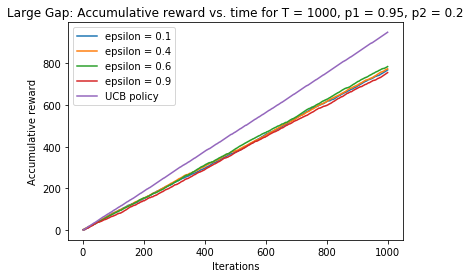

In [11]:
iterations = np.arange(1, 1001)
plt.plot(iterations, ep1, label = 'epsilon = 0.1')
plt.plot(iterations, ep2, label = 'epsilon = 0.4')
plt.plot(iterations, ep3, label = 'epsilon = 0.6')
plt.plot(iterations, ep4, label = 'epsilon = 0.9')
plt.plot(iterations, ucb, label = 'UCB policy')
plt.xlabel('Iterations')
plt.ylabel('Accumulative reward')
plt.legend()
plt.title('Large Gap: Accumulative reward vs. time for T = 1000, p1 = 0.95, p2 = 0.2')
plt.savefig('1_d.png')
plt.show()